**Set up notebook:**

In [1]:
#Configure Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to dataset folder
data_folder = '/content/drive/My Drive/MA/'

Mounted at /content/drive


In [10]:
#Import required libraries for this notebook
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

**Load dataset:**

In [19]:
#Read data
signals = 'wind-farm-1-signals-training.csv'
signals_test = 'wind-farm-1-signals-testing.csv'
all_data = pd.concat([pd.read_csv(data_folder + signals, delimiter=';'), pd.read_csv(data_folder + signals_test, delimiter=';')], ignore_index=True)

#Filter T_09 data out
wtg_data = all_data[all_data.Turbine_ID == 'T09'].reset_index().drop(columns=['index'])

wtg_data['Timestamp'] = pd.to_datetime(wtg_data['Timestamp'])
wtg_data.set_index('Timestamp', inplace=True)
wtg_data.drop(columns=['Turbine_ID'], inplace=True)
wtg_data = wtg_data[wtg_data['Grd_Prod_Pwr_Avg'] > 0]
print(wtg_data.dtypes)
wtg_data.head()

Gen_RPM_Max              float64
Gen_RPM_Min              float64
Gen_RPM_Avg              float64
Gen_RPM_Std              float64
Gen_Bear_Temp_Avg        float64
                          ...   
Grd_Prod_PsbleCap_Max    float64
Grd_Prod_PsbleCap_Min    float64
Grd_Prod_PsbleCap_Std    float64
Gen_Bear2_Temp_Avg         int64
Nac_Direction_Avg        float64
Length: 81, dtype: object


,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,...,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,44,43,48,29,12.2,10.9,11.2,9.9,1.8,5.2,0.9,6.1,220.1,18,0,33173.0,0,33173.0,0,-13513,0,-13513,68,72,64,39,38,27,39,26,19,-2.2,...,-1.3,0.5,93,39,41,40,38,198.4,0.9,50.0,402.0,399.5,399.1,161.5,198.3,178.0,349.0,46.0,36,0.2,5.1,61.0,-81.1,-72.7,-100.1,5.0,198.1,356.7,45.7,61.5,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
2016-01-01 00:10:00+00:00,1485.0,1239.7,1321.4,50.4,40.0,58,57,58,44,43,48,29,13.1,10.9,11.7,9.1,2.0,5.7,1.1,4.7,218.7,18,0,38381.0,0,38381.0,0,-15366,0,-15366,68,72,64,39,38,27,39,26,19,-2.3,...,-1.6,0.6,93,40,41,41,38,231.1,0.9,50.0,401.8,399.5,399.0,190.5,228.4,207.9,431.3,60.7,36,0.4,5.3,86.4,-92.1,-76.7,-102.1,5.7,231.3,435.5,59.9,86.4,-871.4,-293.3,-1000.0,227.4,871.4,1000.0,293.3,227.4,33,214.0
2016-01-01 00:20:00+00:00,1441.0,1274.6,1363.4,31.0,40.0,58,57,58,44,44,49,29,12.8,11.2,12.0,11.2,1.4,6.2,0.8,2.7,216.7,18,0,52055.0,0,52055.0,0,-15709,0,-15709,68,73,64,39,38,27,39,26,19,-2.5,...,-1.9,0.2,93,40,41,41,38,312.3,1.0,50.0,401.2,398.8,398.2,249.2,290.0,274.7,441.9,191.6,37,0.3,5.8,44.2,-94.3,-33.6,-108.3,13.0,312.4,450.2,184.7,45.1,-999.7,-904.9,-1000.0,4.2,999.7,1000.0,904.9,4.2,33,214.0
2016-01-01 00:30:00+00:00,1549.4,1266.5,1379.7,76.8,41.0,59,58,59,44,44,50,29,13.7,11.2,12.2,10.1,2.4,6.3,1.0,-16.1,197.9,18,0,66365.0,0,66365.0,0,-16444,0,-16444,68,73,65,39,38,27,39,26,19,-2.4,...,-1.9,0.3,93,40,41,41,38,398.8,1.0,50.0,400.7,398.5,398.1,319.2,360.3,346.7,618.5,231.1,37,0.7,6.2,86.4,-98.7,-88.4,-105.5,3.4,398.8,630.0,214.5,86.3,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,33,214.0
2016-01-01 00:40:00+00:00,1536.5,1337.1,1426.9,42.0,41.0,59,58,59,44,45,51,29,13.6,11.8,12.6,11.7,1.9,6.6,0.9,3.2,217.2,18,0,60980.0,0,60980.0,0,-16344,0,-16344,68,73,65,39,38,27,39,26,19,-2.2,...,-2.0,0.1,93,40,41,41,38,366.3,1.0,50.0,400.0,397.8,397.4,294.4,335.2,319.0,541.1,169.9,37,0.4,6.1,63.5,-98.1,-92.0,-106.3,3.7,366.5,544.6,149.2,64.5,-998.9,-730.8,-1000.0,13.9,998.9,1000.0,730.8,13.9,34,214.0


In [ ]:
gen_temp_max = wtg_data['Gen_Bear_Temp_Avg'].max()
wtg_data.loc[wtg_data['Gen_Bear_Temp_Avg'] == gen_temp_max, 'Gen_Bear_Temp_Avg'] = np.NaN

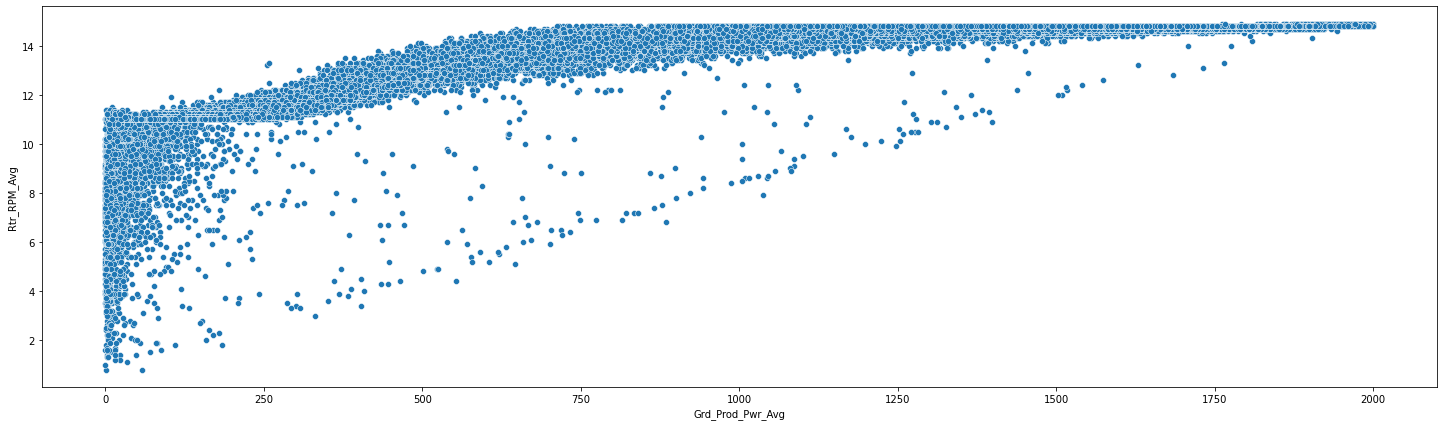

In [20]:
plt.figure(figsize=(25,7))
sns.scatterplot(x='Grd_Prod_Pwr_Avg', y='Rtr_RPM_Avg', data=wtg_data)

In [21]:
wtg_data[(wtg_data['Gen_Bear_Temp_Avg'] > 100) & (wtg_data['Gen_Bear_Temp_Avg'] < 205)]

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,...,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#==========================================================================================================================================

**Feature Selection:**

Causality features = ['Nac_Temp_Avg', 'Amb_Temp_Avg', 'Gen_RPM_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg',
'Prod_LatestAvg_TotActPwr', 'Gen_Bear_Temp_Avg']

In [ ]:
#Using all 3 phase temperatures is redundant (one is enough)
wtg_data[['Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg']].corr(method='kendall')

,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg
Gen_Phase1_Temp_Avg,1.000000,0.991290,0.991051
Gen_Phase2_Temp_Avg,0.991290,1.000000,0.994309
Gen_Phase3_Temp_Avg,0.991051,0.994309,1.000000


In [ ]:
#Using Gen RPM and Production could also be redundant
wtg_data[['Gen_RPM_Avg', 'Prod_LatestAvg_TotActPwr']].corr(method='kendall')

,Gen_RPM_Avg,Prod_LatestAvg_TotActPwr
Gen_RPM_Avg,1.000000,0.823979
Prod_LatestAvg_TotActPwr,0.823979,1.000000


In [ ]:
wtg_data[['Nac_Temp_Avg', 'Amb_Temp_Avg']].corr(method='kendall')

,Nac_Temp_Avg,Amb_Temp_Avg
Nac_Temp_Avg,1.000000,0.740352
Amb_Temp_Avg,0.740352,1.000000


In [22]:
#Normalize data to look at features together on one graph
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(wtg_data)

wtg_data_normalized = pd.DataFrame(scaler.transform(wtg_data), columns=wtg_data.columns, index=wtg_data.index)

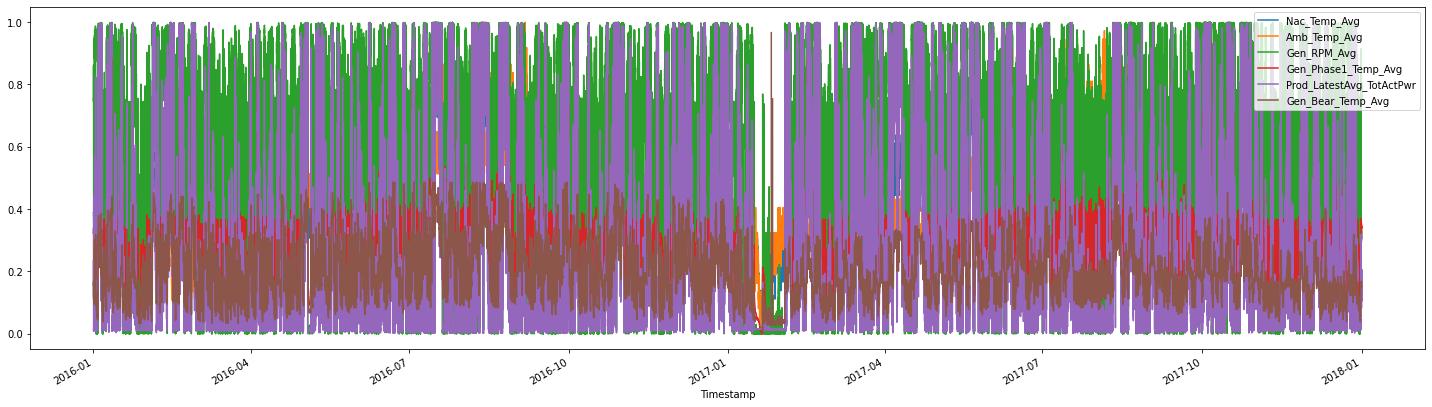

In [ ]:
wtg_data_normalized[['Nac_Temp_Avg', 'Amb_Temp_Avg', 'Gen_RPM_Avg', 'Gen_Phase1_Temp_Avg', 'Prod_LatestAvg_TotActPwr', 'Gen_Bear_Temp_Avg']].plot(figsize=(25,7))

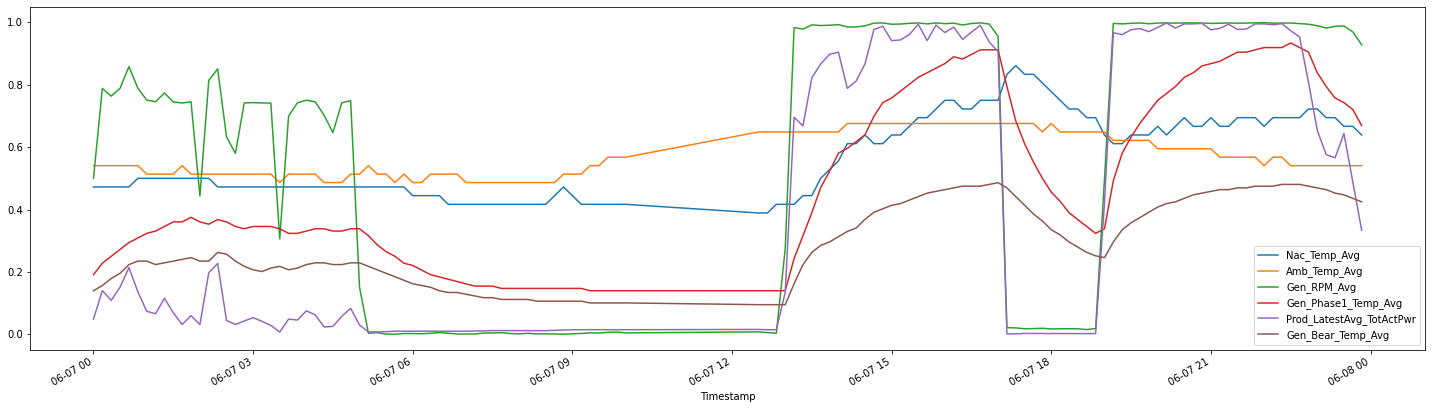

In [ ]:
#Failure on June 7th 2016 @5pm: High temperature. --> Check logs
wtg_data_normalized[(wtg_data_normalized.index.year == 2016) & (wtg_data_normalized.index.month == 6) & (wtg_data_normalized.index.day == 7)][['Nac_Temp_Avg', 'Amb_Temp_Avg', 'Gen_RPM_Avg', 'Gen_Phase1_Temp_Avg', 'Prod_LatestAvg_TotActPwr', 'Gen_Bear_Temp_Avg']].plot(figsize=(25,7))

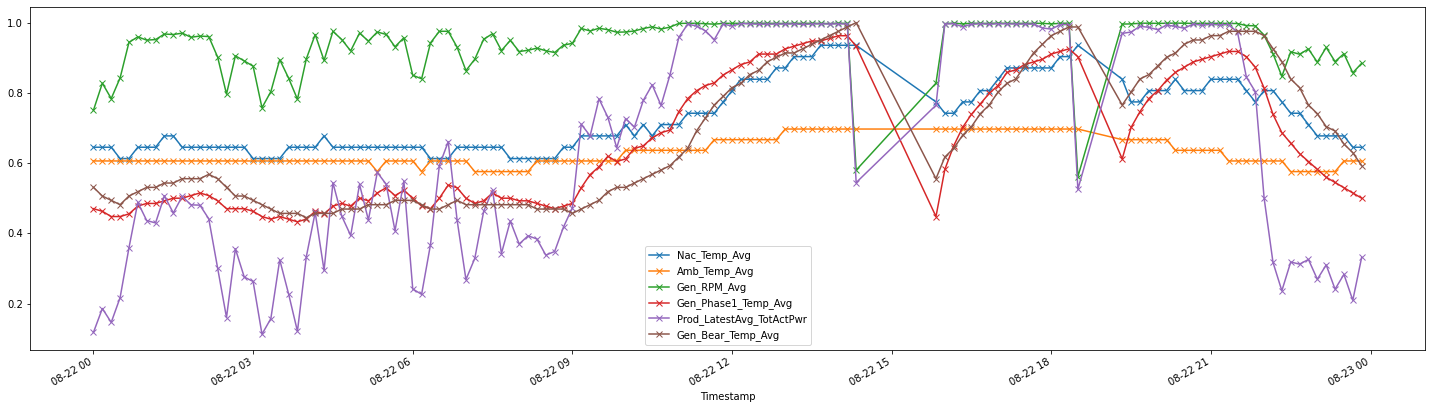

In [24]:
#Failure on August 22nd 2016 @6:25pm: High temperature
wtg_data_normalized[(wtg_data_normalized.index.year == 2016) & (wtg_data_normalized.index.month == 8) & (wtg_data_normalized.index.day == 22)][['Nac_Temp_Avg', 'Amb_Temp_Avg', 'Gen_RPM_Avg', 'Gen_Phase1_Temp_Avg', 'Prod_LatestAvg_TotActPwr', 'Gen_Bear_Temp_Avg']].plot(figsize=(25,7), marker='x')

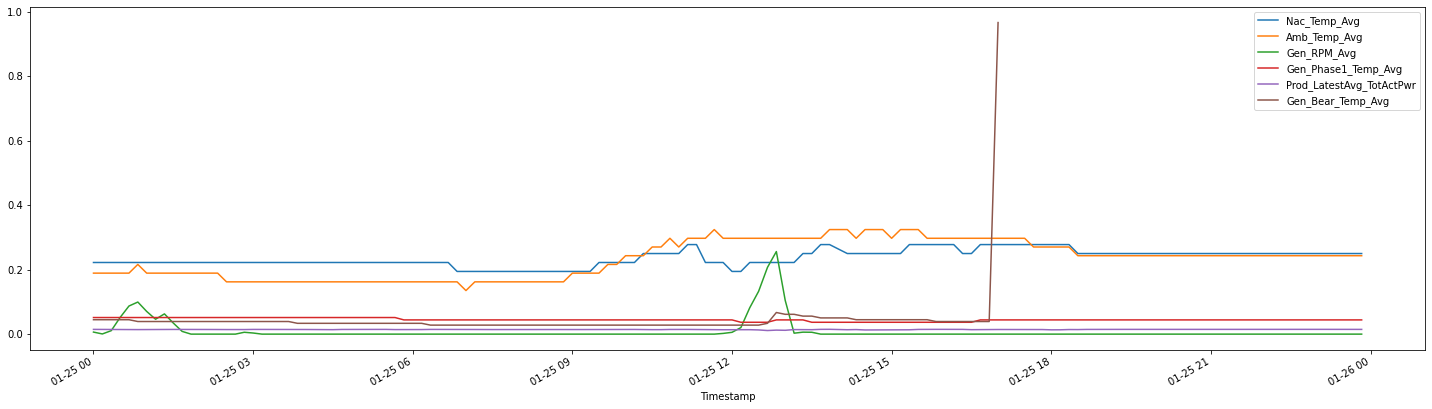

In [ ]:
#Failure on January 25th 2017 @12:55pm: Bearings replaced
wtg_data_normalized[(wtg_data_normalized.index.year == 2017) & (wtg_data_normalized.index.month == 1) & (wtg_data_normalized.index.day == 25)][['Nac_Temp_Avg', 'Amb_Temp_Avg', 'Gen_RPM_Avg', 'Gen_Phase1_Temp_Avg', 'Prod_LatestAvg_TotActPwr', 'Gen_Bear_Temp_Avg']].plot(figsize=(25,7))

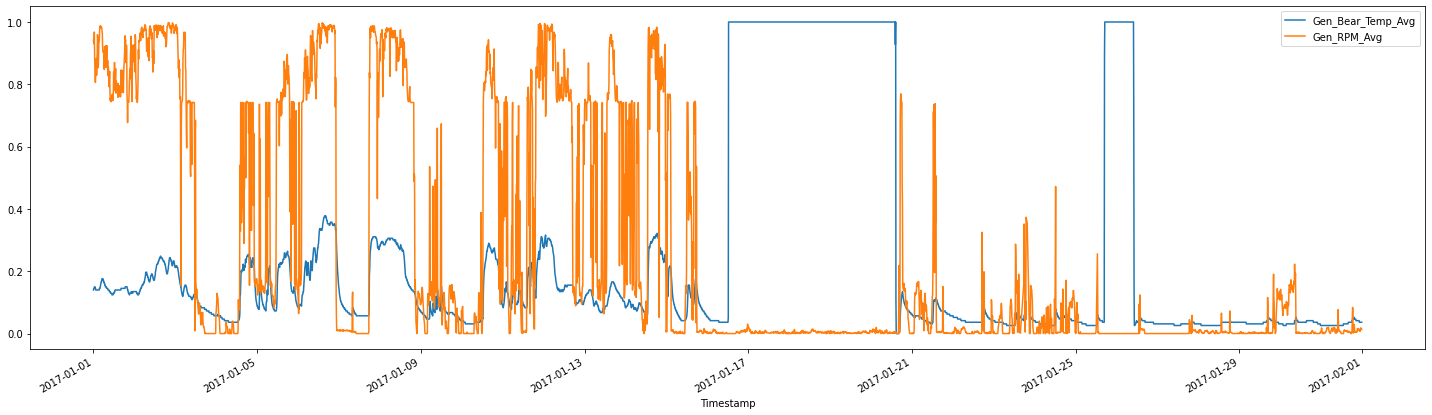

In [6]:

wtg_data_normalized[(wtg_data_normalized.index.year == 2017) & (wtg_data_normalized.index.month == 1) ][['Gen_Bear_Temp_Avg', 'Gen_RPM_Avg']].plot(figsize=(25,7))

In [ ]:
#Create Kendall's correlation matrix for column 'Gen_Bear_Temp_Avg'
for periods in [0, 1, 2, 3]:
  corr = wtg_data.shift(periods=periods).corrwith(wtg_data['Gen_Bear_Temp_Avg'], method='kendall')
  pd.DataFrame(corr[(corr >= 0.5) | (corr <= -0.5)]).to_excel('corr_lag_{}.xls'.format(periods))
  files.download('corr_lag_{}.xls'.format(periods))

In [ ]:
'''
Using the parameter freq in the shift method will lead to shifting the index while keeping the original data. E.g:
Consider the following df:
            Col1  Col2  Col3
2020-01-01    10    13    17
2020-01-02    20    23    27
2020-01-03    15    18    22
2020-01-04    30    33    37
2020-01-05    45    48    52

df.shift(periods=3) would result in:
            Col1  Col2  Col3
2020-01-01   NaN   NaN   NaN
2020-01-02   NaN   NaN   NaN
2020-01-03   NaN   NaN   NaN
2020-01-04  10.0  13.0  17.0
2020-01-05  20.0  23.0  27.0

However, df.shift(periods=3, freq="D") would result in:
            Col1  Col2  Col3
2020-01-04    10    13    17
2020-01-05    20    23    27
2020-01-06    15    18    22
2020-01-07    30    33    37
2020-01-08    45    48    52
'''